In [1]:
'''
    Search all posible and interested atom types from a given dataset
'''
import numpy as np
import pandas as pd
from os import listdir
from rdkit import Chem
from scipy.spatial.distance import cdist
from itertools import product
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator
from biopandas.pdb import PandasPdb
import glob
import tqdm.notebook as tqdm
from biopandas.mol2 import PandasMol2

In [2]:
def pdb_to_df(pdb_file):
    ppdb = PandasPdb()
    ppdb.read_pdb(pdb_file)
    return ppdb.df['ATOM']

In [3]:
def mol2_to_df(mol2_file):
    pmol = PandasMol2().read_mol2(mol2_file)
    return pmol.df    

In [4]:
def collect_atom_types(list_pdb_files, include_hydrogen=False):
    '''
        Read all pdb files and select unique atom types
    '''
    possible_atom_types = set()
    
    for index, pdb_file in tqdm.tqdm(enumerate(list_pdb_files)):
        df_pdb = pdb_to_df(pdb_file)
        if not include_hydrogen:            
            pdb_atom_types = set(df_pdb[df_pdb['element_symbol']!='H']['atom_name'].unique())
        else:
            pdb_atom_types = set(df_pdb['atom_name'].unique())
        if index==1:
            possible_atom_types = pdb_atom_types
        else:
            possible_atom_types = possible_atom_types.union(pdb_atom_types)
    return possible_atom_types

In [5]:
# all_files = listdir('../data/refined-set/')
all_pdb_files = glob.iglob('../data/2020/' + '**/*_protein.pdb', recursive=True)
possible_atom_types = collect_atom_types(all_pdb_files)

0it [00:00, ?it/s]

KeyboardInterrupt: 

In [ ]:
hydrogen_types = ['HD', 'HE', 'HG', 'HH', 'HA', 'HB', 'HN', 'HZ']
possible_atom_types_list = list(possible_atom_types)

In [7]:
def ishydrogen_type(a):
    result = False
    for h in hydrogen_types:
        if h in a:
            return True

In [8]:
possible_atom_types_list = [a for a in possible_atom_types if not ishydrogen_type(a)]

In [13]:
possible_atom_types_list = [a for a in possible_atom_types_list if a != 'H']

In [15]:
len(possible_atom_types_list)

37

In [16]:
possible_atom_types_list = sorted(possible_atom_types_list)

In [17]:
df_atom_type = pd.DataFrame(data={'AtomType': possible_atom_types_list,
                                 'Radius': 0})
df_atom_type.to_csv('protein_atom_types2.csv', index=False)

In [21]:
def initialize_atom_type_dict(possible_atom_types_list):
    atom_type_dict = {}
    for atom_type in possible_atom_types_list:
        atom_type_dict[atom_type] = {'total_appearance': 0, 'distinct_appearance': 0}
    return atom_type_dict

In [22]:
all_pdb_files = glob.iglob('../data/pdb_v16_refined_80/' + '**/*_protein.pdb', recursive=True)

def count_atom_types(possible_atom_types_list, atom_type_dict, pdb_file):
    df_pdb = pdb_to_df(pdb_file)
    atom_types = df_pdb['atom_name'].tolist()
    distinct_atom_types = set(atom_types)
    for atom_type in distinct_atom_types:
        num_apperances = atom_types.count(atom_type)
#         if atom_type not in possible_atom_types_list.keys():
#             atom_type_dict[atom_type] = {'total_appearance': 0, 'distinct_appearance': 0}
        if atom_type in possible_atom_types_list:
            atom_type_dict[atom_type]['total_appearance'] += num_apperances
            if num_apperances > 0:
                atom_type_dict[atom_type]['distinct_appearance'] += 1

In [23]:
all_pdb_files = list(all_pdb_files)

In [24]:
atom_type_dict = initialize_atom_type_dict(possible_atom_types_list)
for pdb_file in tqdm.tqdm(all_pdb_files):
    count_atom_types(possible_atom_types_list, atom_type_dict, pdb_file)

  0%|          | 0/2390 [00:00<?, ?it/s]

In [25]:
atom_type_dict

{'C': {'total_appearance': 1320490, 'distinct_appearance': 2390},
 'CA': {'total_appearance': 1320473, 'distinct_appearance': 2390},
 'CB': {'total_appearance': 1220556, 'distinct_appearance': 2390},
 'CD': {'total_appearance': 328022, 'distinct_appearance': 2390},
 'CD1': {'total_appearance': 318747, 'distinct_appearance': 2390},
 'CD2': {'total_appearance': 277339, 'distinct_appearance': 2390},
 'CE': {'total_appearance': 97915, 'distinct_appearance': 2390},
 'CE1': {'total_appearance': 135626, 'distinct_appearance': 2390},
 'CE2': {'total_appearance': 124897, 'distinct_appearance': 2390},
 'CE3': {'total_appearance': 22045, 'distinct_appearance': 2213},
 'CG': {'total_appearance': 769521, 'distinct_appearance': 2390},
 'CG1': {'total_appearance': 167690, 'distinct_appearance': 2390},
 'CG2': {'total_appearance': 240495, 'distinct_appearance': 2390},
 'CH2': {'total_appearance': 22045, 'distinct_appearance': 2213},
 'CZ': {'total_appearance': 166567, 'distinct_appearance': 2390},
 'C

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

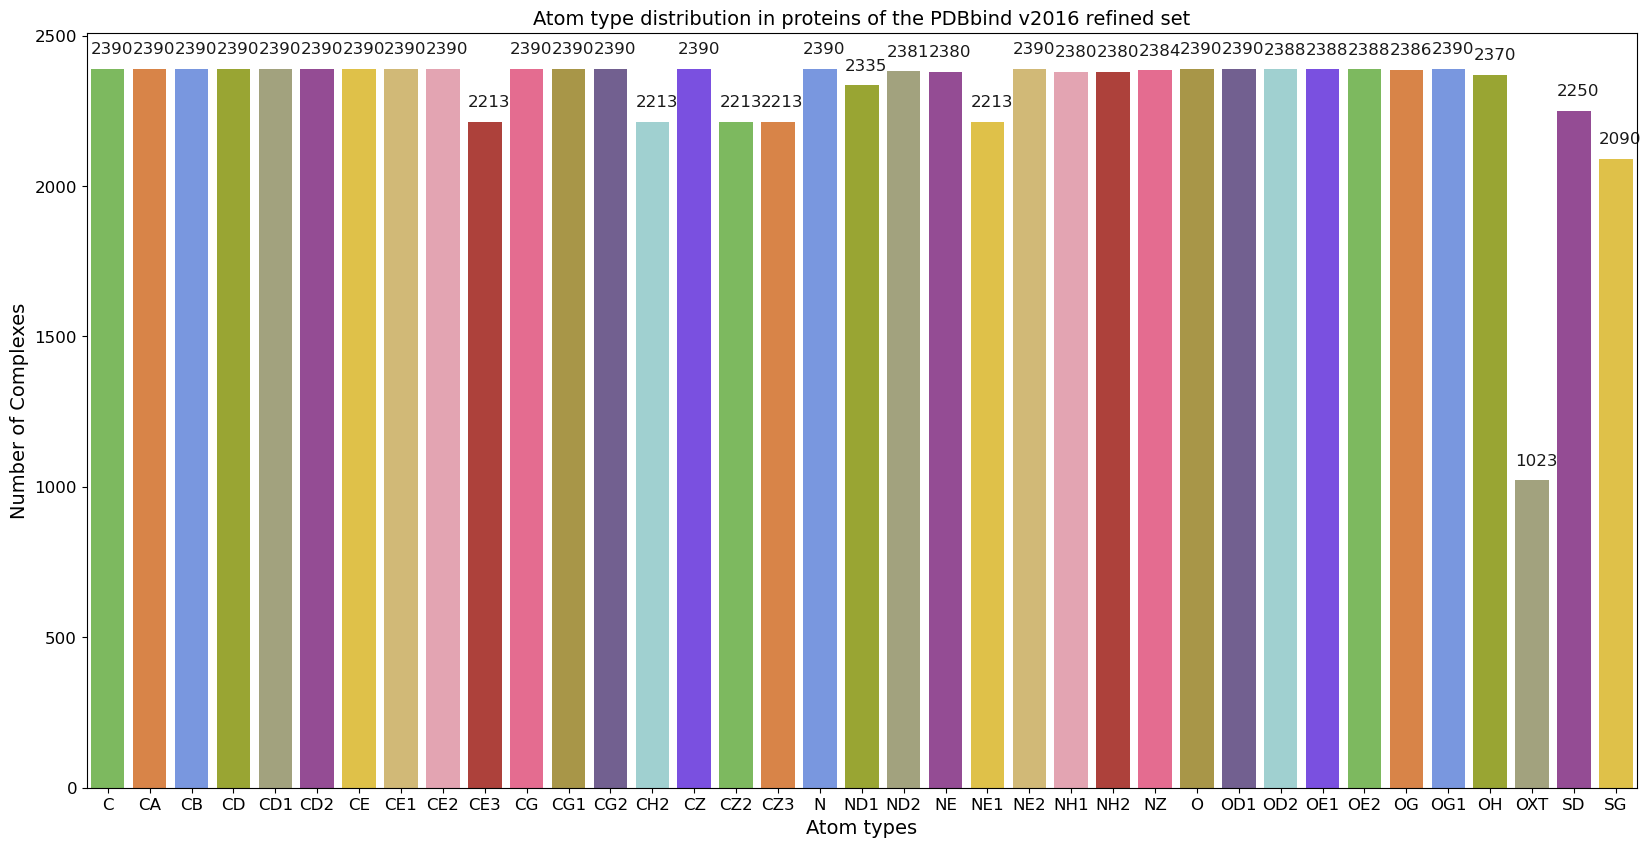

In [26]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
number_complex_appearances = [atom_type_dict[a]['distinct_appearance'] for a in possible_atom_types_list]
# for atom_type in possible_atom_types_list:
#     number_complex_appearances.append(atom_type_dict[atom_type]['distinct_appearance'])
df = pd.DataFrame({'Atom Types': possible_atom_types_list, 'Number of Complexes': number_complex_appearances})
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]
# Count Plot (a.k.a. Bar Plot)
plt.figure(num=None, figsize=(20, 10), dpi=100, facecolor='w', edgecolor='k')
ax = sns.barplot(x='Atom Types', y='Number of Complexes', data=df, palette=pkmn_type_colors)
for index, row in df.iterrows():
   ax.text(index-0.4, row['Number of Complexes']+50,  '%d' % row['Number of Complexes'], color='black',  alpha=0.9, fontsize=12)
ax.set_ylabel('Number of Complexes', fontsize=14)
ax.set_xlabel('Atom types', fontsize=14)
plt.title('Atom type distribution in proteins of the PDBbind v2016 refined set', fontsize=14)
plt.xticks(fontsize=12, rotation=0, ha="center")

plt.yticks(fontsize=12)
# plt.savefig('PBDbindv2018_general_atomtype_distribtuion_protein.png', dpi=300, format='png', bbox_inches='tight')

<font color=orange> Search atom types for ligands</font>

In [27]:
from biopandas.mol2 import PandasMol2

In [28]:
def collect_atom_types_for_ligand(list_mol2_files, include_hydrogen=False):
    '''
        Read all pdb files and select unique atom types
    '''
    possible_atom_types = set()
    
    for index, mol2_file in tqdm.tqdm(enumerate(list_mol2_files)):
        df_mol2 = mol2_to_df(mol2_file)
        if not include_hydrogen:            
            mol2_atom_types = set(df_mol2[df_mol2['atom_type']!='H']['atom_type'].unique())
        else:
            mol2_atom_types = set(df_mol2['atom_type'].unique())
        if index==1:
            possible_atom_types = mol2_atom_types
        else:
            possible_atom_types = possible_atom_types.union(mol2_atom_types)
    return possible_atom_types

In [29]:
all_mol2_files = glob.iglob('../data/pdb_v16_refined_80/' + '**/*_ligand.mol2', recursive=True)
possible_atom_types_for_ligand = collect_atom_types_for_ligand(all_mol2_files)

0it [00:00, ?it/s]

In [30]:
possible_atom_types_for_ligand

{'Br',
 'C.1',
 'C.2',
 'C.3',
 'C.ar',
 'C.cat',
 'Cl',
 'F',
 'I',
 'N.1',
 'N.2',
 'N.4',
 'N.am',
 'N.ar',
 'N.pl3',
 'O.2',
 'O.3',
 'O.co2',
 'P.3',
 'S.2',
 'S.3',
 'S.o',
 'S.o2'}

In [32]:
def initialize_atom_type_dict(possible_atom_types_for_ligand):
    atom_type_dict = {}
    for atom_type in possible_atom_types_for_ligand:
        atom_type_dict[atom_type] = {'total_appearance': 0, 'distinct_appearance': 0}
    return atom_type_dict

In [33]:
atom_type_dict_for_ligand = initialize_atom_type_dict(possible_atom_types_for_ligand)

In [34]:
atom_type_dict_for_ligand

{'N.pl3': {'total_appearance': 0, 'distinct_appearance': 0},
 'C.1': {'total_appearance': 0, 'distinct_appearance': 0},
 'O.3': {'total_appearance': 0, 'distinct_appearance': 0},
 'C.cat': {'total_appearance': 0, 'distinct_appearance': 0},
 'N.4': {'total_appearance': 0, 'distinct_appearance': 0},
 'N.am': {'total_appearance': 0, 'distinct_appearance': 0},
 'P.3': {'total_appearance': 0, 'distinct_appearance': 0},
 'F': {'total_appearance': 0, 'distinct_appearance': 0},
 'C.2': {'total_appearance': 0, 'distinct_appearance': 0},
 'S.o2': {'total_appearance': 0, 'distinct_appearance': 0},
 'Cl': {'total_appearance': 0, 'distinct_appearance': 0},
 'O.2': {'total_appearance': 0, 'distinct_appearance': 0},
 'S.2': {'total_appearance': 0, 'distinct_appearance': 0},
 'I': {'total_appearance': 0, 'distinct_appearance': 0},
 'N.1': {'total_appearance': 0, 'distinct_appearance': 0},
 'N.2': {'total_appearance': 0, 'distinct_appearance': 0},
 'C.3': {'total_appearance': 0, 'distinct_appearance': 

In [35]:
def count_atom_types_for_ligand(possible_atom_types_list, atom_type_dict, mol2_file):
    df_mol2 = mol2_to_df(mol2_file)
    atom_types = df_mol2['atom_type'].tolist()
    distinct_atom_types = set(atom_types)
    for atom_type in distinct_atom_types:
        num_apperances = atom_types.count(atom_type)
#         if atom_type not in possible_atom_types_list.keys():
#             atom_type_dict[atom_type] = {'total_appearance': 0, 'distinct_appearance': 0}
        if atom_type in possible_atom_types_list:
            atom_type_dict[atom_type]['total_appearance'] += num_apperances
            if num_apperances > 0:
                atom_type_dict[atom_type]['distinct_appearance'] += 1

In [36]:
atom_type_dict_for_ligand = initialize_atom_type_dict(possible_atom_types_for_ligand)
all_mol2_files = glob.iglob('../data/pdb_v16_refined_80/' + '**/*_ligand.mol2', recursive=True)

for mol2_file in tqdm.tqdm(all_mol2_files):
    count_atom_types_for_ligand(possible_atom_types_for_ligand, atom_type_dict_for_ligand, mol2_file)


0it [00:00, ?it/s]

In [37]:
atom_type_dict_for_ligand

{'N.pl3': {'total_appearance': 1821, 'distinct_appearance': 949},
 'C.1': {'total_appearance': 83, 'distinct_appearance': 53},
 'O.3': {'total_appearance': 6200, 'distinct_appearance': 1643},
 'C.cat': {'total_appearance': 183, 'distinct_appearance': 154},
 'N.4': {'total_appearance': 830, 'distinct_appearance': 678},
 'N.am': {'total_appearance': 2362, 'distinct_appearance': 1136},
 'P.3': {'total_appearance': 862, 'distinct_appearance': 523},
 'F': {'total_appearance': 337, 'distinct_appearance': 164},
 'C.2': {'total_appearance': 6660, 'distinct_appearance': 1994},
 'S.o2': {'total_appearance': 187, 'distinct_appearance': 170},
 'Cl': {'total_appearance': 253, 'distinct_appearance': 176},
 'O.2': {'total_appearance': 2869, 'distinct_appearance': 1319},
 'S.2': {'total_appearance': 11, 'distinct_appearance': 11},
 'I': {'total_appearance': 15, 'distinct_appearance': 12},
 'N.1': {'total_appearance': 37, 'distinct_appearance': 33},
 'N.2': {'total_appearance': 1044, 'distinct_appearan

(array([   0.,  500., 1000., 1500., 2000., 2500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

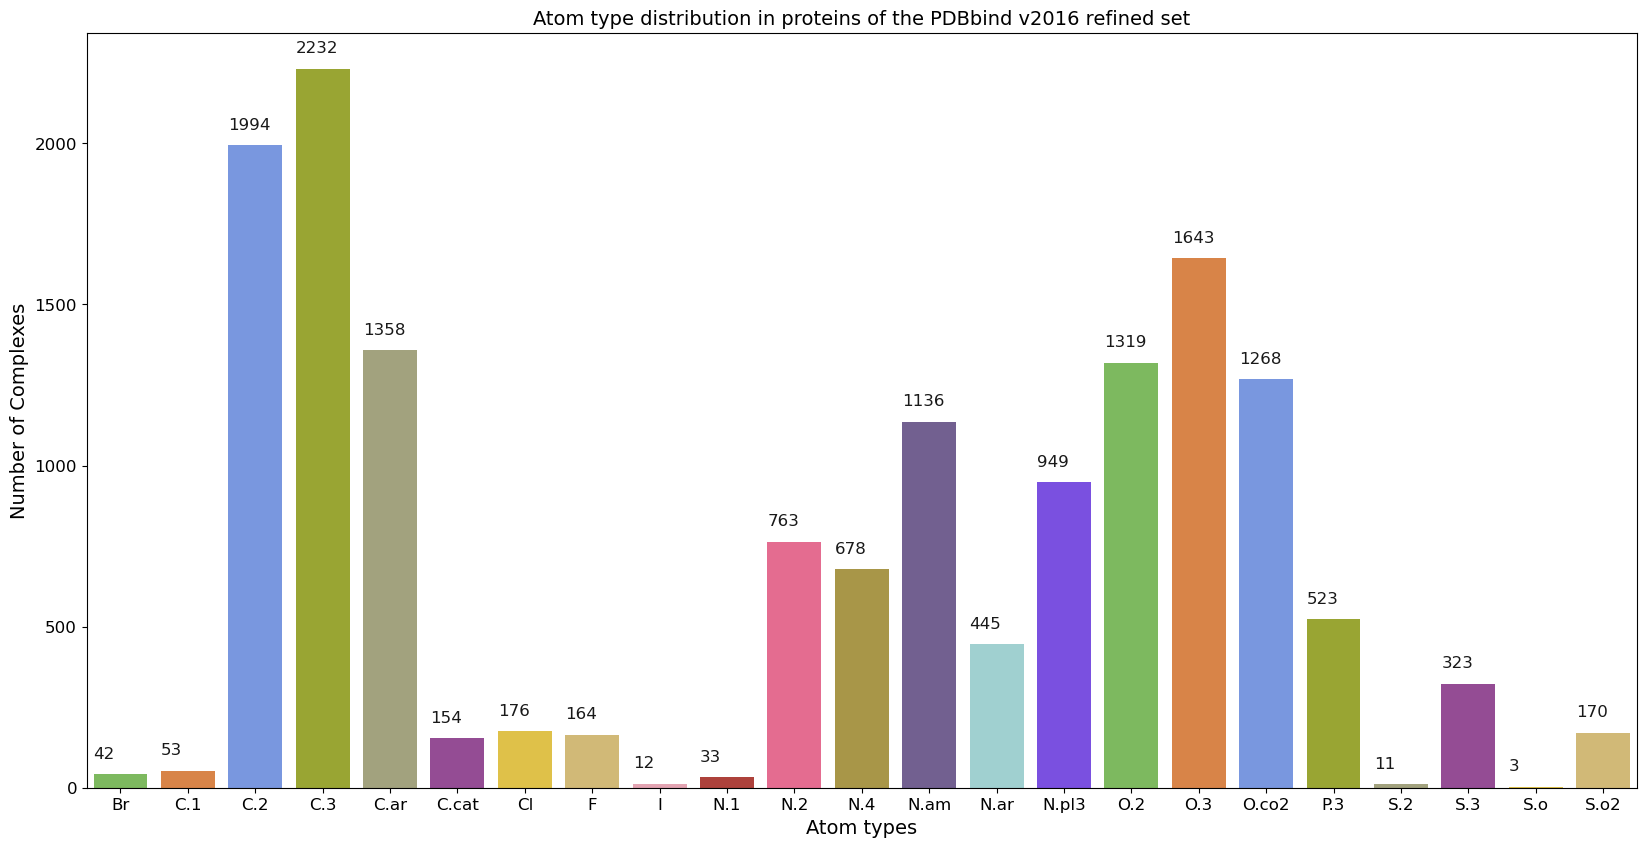

In [38]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
possible_atom_types_for_ligand = list(possible_atom_types_for_ligand)
possible_atom_types_for_ligand = sorted(possible_atom_types_for_ligand)

number_complex_appearances = [atom_type_dict_for_ligand[a]['distinct_appearance'] 
                              for a in possible_atom_types_for_ligand]
# for atom_type in possible_atom_types_list:
#     number_complex_appearances.append(atom_type_dict[atom_type]['distinct_appearance'])
df = pd.DataFrame({'Atom Types': possible_atom_types_for_ligand, 'Number of Complexes': number_complex_appearances})
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]
# Count Plot (a.k.a. Bar Plot)
plt.figure(num=None, figsize=(20, 10), dpi=100, facecolor='w', edgecolor='k')
ax = sns.barplot(x='Atom Types', y='Number of Complexes', data=df, palette=pkmn_type_colors)
for index, row in df.iterrows():
   ax.text(index-0.4, row['Number of Complexes']+50,  '%d' % row['Number of Complexes'], color='black',  alpha=0.9, fontsize=12)
ax.set_ylabel('Number of Complexes', fontsize=14)
ax.set_xlabel('Atom types', fontsize=14)
plt.title('Atom type distribution in proteins of the PDBbind v2016 refined set', fontsize=14)
plt.xticks(fontsize=12, rotation=0, ha="center")

plt.yticks(fontsize=12)
# plt.savefig('PBDbindv2018_general_atomtype_distribtuion_protein.png', dpi=300, format='png', bbox_inches='tight')

In [139]:
df_atom_type = pd.DataFrame(data={'AtomType': possible_atom_types_for_ligand,
                           'Radius': 0})
df_atom_type.to_csv('ligand_atom_types.csv', index=False)